In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Parse the data file to obtain the raw data

In [73]:
path = '/Users/ziegler/Desktop/'
file='3antenna_source_in_center copy.csv'

raw_data={'f':[],'s21':{'mag':[],'phi':[]},'s31':{'mag':[],'phi':[]},'s41':{'mag':[],'phi':[]}}
#frequency_of_interest=26e9
with open(path+file) as infile:
    read=csv.reader(infile,delimiter=',')
    for row in read:
        #print(row)
        try:
            if len(row)>0:
                raw_data['f'].append(float(row[0]))
                raw_data['s21']['mag'].append(float(row[9]))
                raw_data['s21']['phi'].append(float(row[10]))
                raw_data['s31']['mag'].append(float(row[17]))
                raw_data['s31']['phi'].append(float(row[18]))
                raw_data['s41']['mag'].append(float(row[25]))
                raw_data['s41']['phi'].append(float(row[26]))
                #if int(row[0])==int(frequency_of_interest):
                    
                #    raw_data.update({'s':[]})
                #    for n in row[1:]:
                #        raw_data['s'].append(float(n))
        except ValueError:
            continue

# Plot of the unwrapped phases of S21, S31, and S41

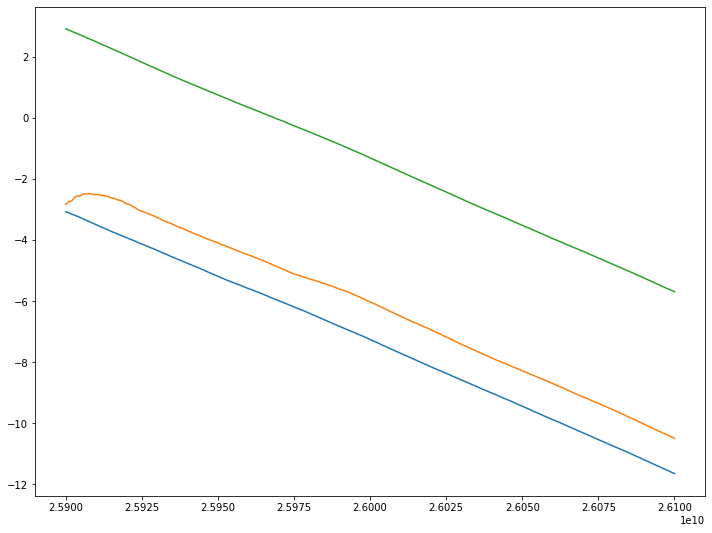

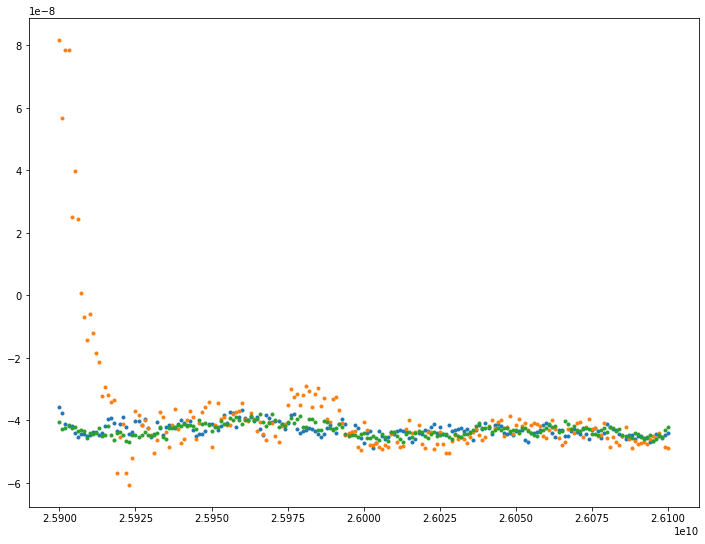

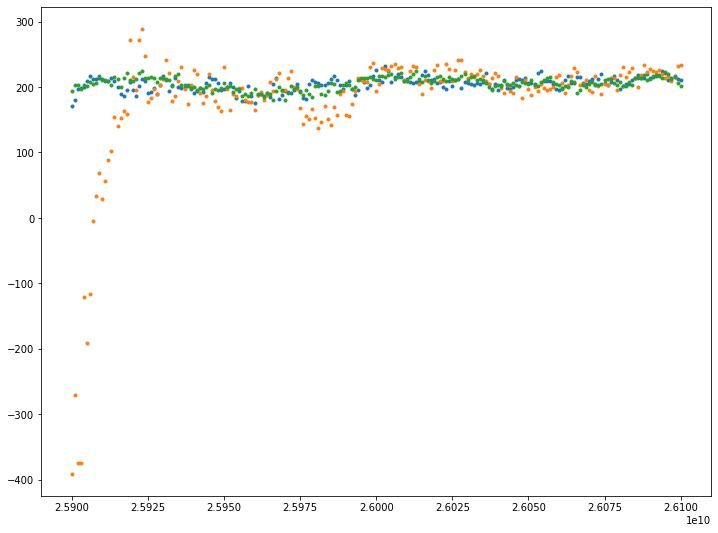

In [72]:
plt.figure(figsize=(12,9))
plt.plot(raw_data['f'],np.unwrap(np.radians(raw_data['s21']['phi'])))
plt.plot(raw_data['f'],np.unwrap(np.radians(raw_data['s31']['phi'])))
plt.plot(raw_data['f'],np.unwrap(np.radians(raw_data['s41']['phi'])))

plt.figure(figsize=(12,9))
plt.plot(raw_data['f'],np.gradient(np.unwrap(np.radians(raw_data['s21']['phi'])),raw_data['f']),'.')
plt.plot(raw_data['f'],np.gradient(np.unwrap(np.radians(raw_data['s31']['phi'])),raw_data['f']),'.')
plt.plot(raw_data['f'],np.gradient(np.unwrap(np.radians(raw_data['s41']['phi'])),raw_data['f']),'.')

r2=-np.gradient(np.unwrap(np.radians(raw_data['s21']['phi'])),raw_data['f'])*3e10/(2*np.pi) # in cm
r3=-np.gradient(np.unwrap(np.radians(raw_data['s31']['phi'])),raw_data['f'])*3e10/(2*np.pi)
r4=-np.gradient(np.unwrap(np.radians(raw_data['s41']['phi'])),raw_data['f'])*3e10/(2*np.pi)

plt.figure(figsize=(12,9))
plt.plot(raw_data['f'],r2,'.')
plt.plot(raw_data['f'],r3,'.')
plt.plot(raw_data['f'],r4,'.')
#print(r2,r3,r4)

In [74]:
file='3antenna_s41_antenna_twice_as_far.csv'

raw_data1={'f':[],'s21':{'mag':[],'phi':[]},'s31':{'mag':[],'phi':[]},'s41':{'mag':[],'phi':[]}}
#frequency_of_interest=26e9
with open(path+file) as infile:
    read=csv.reader(infile,delimiter=',')
    for row in read:
        #print(row)
        try:
            if len(row)>0:
                raw_data1['f'].append(float(row[0]))
                raw_data1['s21']['mag'].append(float(row[9]))
                raw_data1['s21']['phi'].append(float(row[10]))
                raw_data1['s31']['mag'].append(float(row[17]))
                raw_data1['s31']['phi'].append(float(row[18]))
                raw_data1['s41']['mag'].append(float(row[25]))
                raw_data1['s41']['phi'].append(float(row[26]))
                #if int(row[0])==int(frequency_of_interest):
                    
                #    raw_data.update({'s':[]})
                #    for n in row[1:]:
                #        raw_data['s'].append(float(n))
        except ValueError:
            continue

181.63853855721393 196.71372097844113


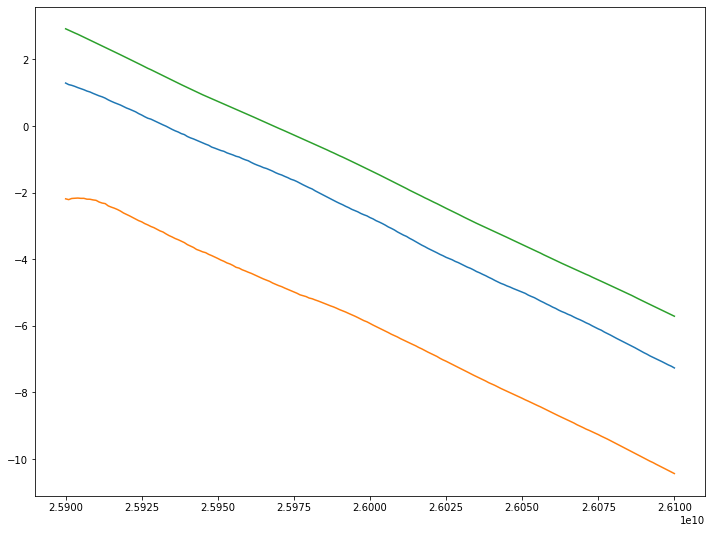

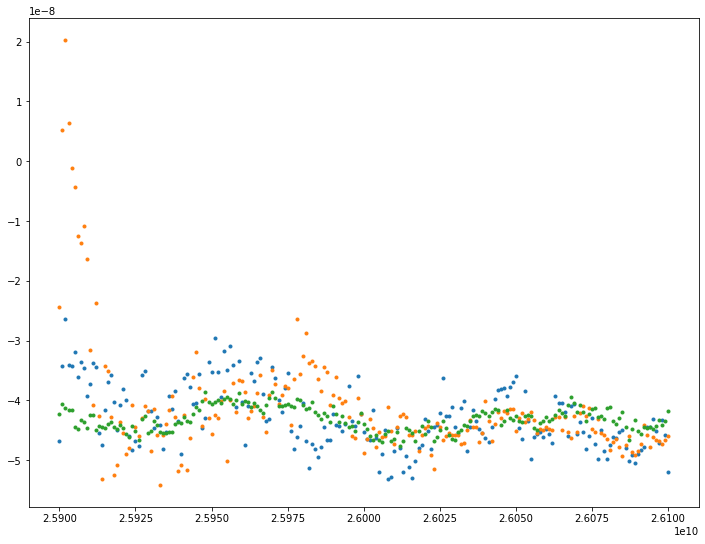

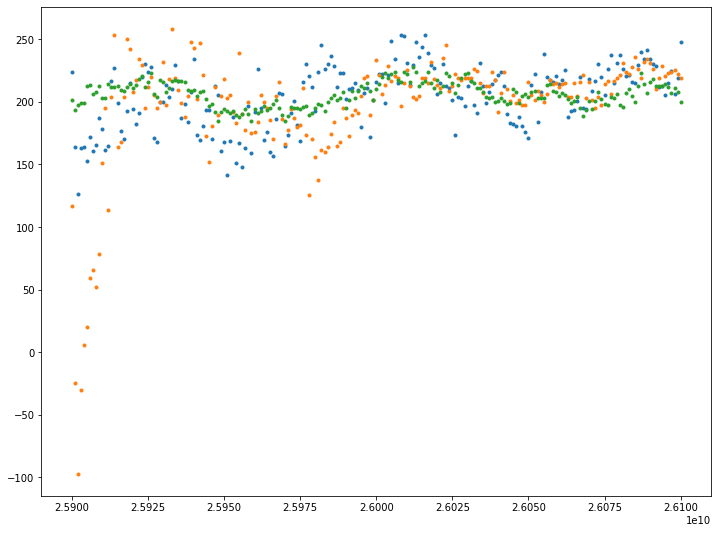

In [77]:
plt.figure(figsize=(12,9))
plt.plot(raw_data1['f'],np.unwrap(np.radians(raw_data1['s21']['phi'])))
plt.plot(raw_data1['f'],np.unwrap(np.radians(raw_data1['s31']['phi'])))
plt.plot(raw_data1['f'],np.unwrap(np.radians(raw_data1['s41']['phi'])))

plt.figure(figsize=(12,9))
plt.plot(raw_data1['f'],np.gradient(np.unwrap(np.radians(raw_data1['s21']['phi'])),raw_data1['f']),'.')
plt.plot(raw_data1['f'],np.gradient(np.unwrap(np.radians(raw_data1['s31']['phi'])),raw_data1['f']),'.')
plt.plot(raw_data1['f'],np.gradient(np.unwrap(np.radians(raw_data1['s41']['phi'])),raw_data1['f']),'.')

r2_1=-np.gradient(np.unwrap(np.radians(raw_data1['s21']['phi'])),raw_data1['f'])*3e10/(2*np.pi) # in cm
r3_1=-np.gradient(np.unwrap(np.radians(raw_data1['s31']['phi'])),raw_data1['f'])*3e10/(2*np.pi)
r4_1=-np.gradient(np.unwrap(np.radians(raw_data1['s41']['phi'])),raw_data1['f'])*3e10/(2*np.pi)

plt.figure(figsize=(12,9))
plt.plot(raw_data1['f'],r2_1,'.')
plt.plot(raw_data1['f'],r3_1,'.')
plt.plot(raw_data1['f'],r4_1,'.')
print(np.mean(r3),np.mean(r3_1))

# Zero pad frequencies before the starting frequency in the raw data

In [46]:
pad_data={'f':[],'s21':{'mag':[],'phi':[]},'s31':{'mag':[],'phi':[]},'s41':{'mag':[],'phi':[]}}
for i,k in enumerate(raw_data):
    if i==0:
        pad_data['f']=np.append(np.arange(0,raw_data['f'][0],raw_data['f'][1]-raw_data['f'][0]),raw_data['f'])
        print(k)
    else:
        for j,l in enumerate(raw_data[k]):
            print(k,l)
            pad_data[k][l]=np.append(np.zeros(len(np.arange(0,raw_data['f'][0],raw_data['f'][1]-raw_data['f'][0])))
                                     ,raw_data[k][l])



f
s21 mag
s21 phi
s31 mag
s31 phi
s41 mag
s41 phi


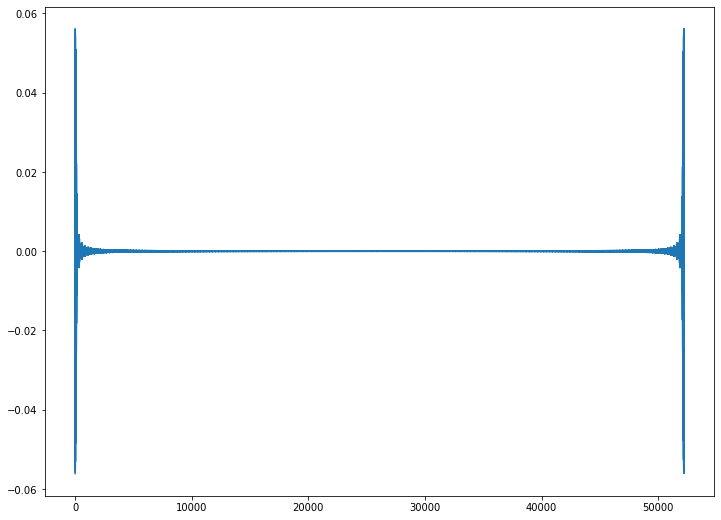

In [50]:
#plt.figure(figsize=(12,9))
#plt.plot(pad_data['f'],np.unwrap(np.radians(pad_data['s21']['phi'])))
#plt.plot(pad_data['f'],np.unwrap(np.radians(pad_data['s31']['phi'])))
#plt.plot(pad_data['f'],np.unwrap(np.radians(pad_data['s41']['phi'])))

plt.figure(figsize=(12,9))
plt.plot(np.fft.irfft(np.unwrap(np.radians(pad_data['s21']['phi']))))

In [36]:
raw_data['f'][0]

25900000000.0